### Note: warnings module to avoid all types of warning

In [1]:

import warnings
warnings.filterwarnings("ignore")

# Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Loading the Data 

In [3]:
df=pd.read_excel('HR-Employee-Attrition.xlsx', sheet_name='HR-Employee-Attriti')

In [4]:
df.shape

(1470, 35)

In [5]:
for i in df.columns:
    print(i)


Age
Attrition
BusinessTravel
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobLevel
JobRole
JobSatisfaction
MaritalStatus
MonthlyIncome
MonthlyRate
NumCompaniesWorked
Over18
OverTime
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [6]:
df.head(11)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isna().values.any()

False

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
for column in df.columns:
  if df[column].dtype==object:
    print(column + '  : ' + ' ' + df[column].unique())
  
    print()
    print(df[column].value_counts())
    print('*****************************************************************************************************************************')
    print()

['Attrition  :  Yes' 'Attrition  :  No']

No     1233
Yes     237
Name: Attrition, dtype: int64
*****************************************************************************************************************************

['BusinessTravel  :  Travel_Rarely' 'BusinessTravel  :  Travel_Frequently'
 'BusinessTravel  :  Non-Travel']

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*****************************************************************************************************************************

['Department  :  Sales' 'Department  :  Research & Development'
 'Department  :  Human Resources']

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*****************************************************************************************************************************

['EducationField  :  Life Sciences' 'EducationField  :  Other'
 'EducationField

In [11]:
df.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [12]:
#cross tabulation of Attrition and Gender
pd.crosstab(df.Attrition,df.Gender)

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [13]:
#cross tabulation of Attrition and Martial status
pd.crosstab(df.Attrition,df.MaritalStatus)

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


In [14]:
#cross tabulation of BusinessTravel and JobRole
pd.crosstab(df.BusinessTravel,df.JobRole).T

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
JobRole,,,
Healthcare Representative,15,26,90
Human Resources,4,10,38
Laboratory Technician,28,51,180
Manager,12,13,77
Manufacturing Director,13,29,103
Research Director,6,12,62
Research Scientist,28,54,210
Sales Executive,39,59,228
Sales Representative,5,23,55


In [15]:
#cross tabulation of BusinessTravel and Department
pd.crosstab(df.BusinessTravel,df.Department).T

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Department,,,
Human Resources,6,11,46
Research & Development,97,182,682
Sales,47,84,315


In [16]:
#groupby to find the Average DistanceFromHome for Attrition 
df.DistanceFromHome.groupby(df.Attrition).mean()

Attrition
No      8.915653
Yes    10.632911
Name: DistanceFromHome, dtype: float64

In [17]:
yes=df[df.Attrition=="Yes"]
no=df[df.Attrition=="No"]

In [18]:
from scipy.stats import ttest_ind

In [19]:
ttest_ind(yes.DistanceFromHome,no.DistanceFromHome,equal_var=False)
# SINCE pvalue=0.004136511971511406 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE b/w Distancefromhome and
# Attrition

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

In [20]:
#groupby to find the Average age for Attrition 
df.Age.groupby(df.Attrition).mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

In [21]:
ttest_ind(yes.Age,no.Age,equal_var=False)
# SINCE pvalue=1.3797600649439775e-08 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE b/w Age and
# Attrition

Ttest_indResult(statistic=-5.828011853988949, pvalue=1.3797600649439775e-08)

In [22]:
#groupby to find the Average DistanceFromHome for Attrition 
df.MonthlyIncome.groupby(df.Attrition).mean()

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

In [23]:
ttest_ind(yes.MonthlyIncome,no.MonthlyIncome,equal_var=False)
# SINCE pvalue=4.433588628286071e-13 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE MonthlyIncome and
# Attrition

Ttest_indResult(statistic=-7.482621586644742, pvalue=4.433588628286071e-13)

In [24]:
#conducting ANOVA test in between Department and  NumCompaniesWorked
HR=df[df.Department=="Human Resources"]
RD=df[df.Department=="Research & Development"]
SA=df[df.Department=="Sales"]

In [25]:
from scipy.stats import f_oneway

In [26]:
f_oneway(HR.NumCompaniesWorked,RD.NumCompaniesWorked, SA.NumCompaniesWorked)
# SINCE pvalue=0.38633955863504377 IS greater THAN 0.05,  fail to REJECT NULL
# NULL - THERE IS  SIGNFICANT DIFFERENCE IN NumCompaniesWorked and
#Department

F_onewayResult(statistic=0.9516554241769891, pvalue=0.38633955863504377)

In [27]:
#groupby to find the Average YearsInCurrentRole for  Department 
df.YearsInCurrentRole.groupby(df.Department).mean()

Department
Human Resources           3.539683
Research & Development    4.155047
Sales                     4.486547
Name: YearsInCurrentRole, dtype: float64

In [28]:
f_oneway(HR.YearsInCurrentRole,RD.YearsInCurrentRole,SA.YearsInCurrentRole)
# SINCE pvalue=0.08475645906902989 IS greater THAN 0.05,  fail to REJECT NULL
# NULL - THERE IS  SIGNFICANT DIFFERENCE IN  and YearsInCurrentRole
#Department

F_onewayResult(statistic=2.4721299204569034, pvalue=0.08475645906902989)

In [29]:
#groupby to find the Average PercentSalaryHike for  MaritalStatus
df.PercentSalaryHike.groupby(df.MaritalStatus).mean()

MaritalStatus
Divorced    15.048930
Married     15.292719
Single      15.202128
Name: PercentSalaryHike, dtype: float64

# Conducting Chi-Square Test to find

## 1) Is there Association between Gender and Attrition

## 2) Is there Association between Attrition and OverTime

## 3) Is there Association between Attrition and JobSatisfaction

In [30]:
from scipy.stats import chi2_contingency

In [31]:
chi2_contingency(pd.crosstab(df.Attrition,df.Gender))
# Since p-value=0.29057244902890855 is greater than 0.05, fail to REJECT NULL
# NULL - there is no association between Attrition and gender

(1.1169671241970975,
 0.29057244902890855,
 1,
 array([[493.2, 739.8],
        [ 94.8, 142.2]]))

In [32]:
chi2_contingency(pd.crosstab(df.Attrition,df.OverTime))
# Since p-value=8.15842372153832e-21 is less than 0.05, fail to REJECT NULL
#NULL - there is no association between Attrition and OverTime


(87.56429365828768,
 8.15842372153832e-21,
 1,
 array([[884.06938776, 348.93061224],
        [169.93061224,  67.06938776]]))

In [33]:
chi2_contingency(pd.crosstab(df.Attrition,df.JobSatisfaction))
# Since p-value=0.0005563004510387556 is less than 0.05, REJECT NULL
#NULL - there is no association between Attrition and gender

(17.505077010348,
 0.0005563004510387556,
 3,
 array([[242.40612245, 234.85714286, 370.73877551, 384.99795918],
        [ 46.59387755,  45.14285714,  71.26122449,  74.00204082]]))

In [34]:
# Object datatypes
obj_col = df.select_dtypes(include=['object'])
# Numerical datatypes
num_col = df.select_dtypes(np.number)

In [35]:
obj_col.drop('Attrition',axis=1,inplace = True)


In [36]:
obj_col

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [37]:
num_col.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


# Data Visualization

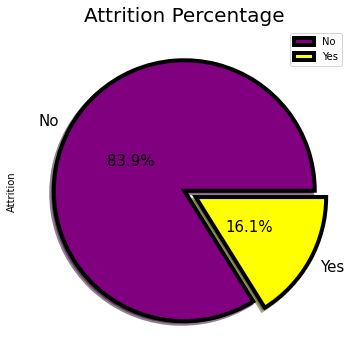

In [38]:
#Using matplotlib
plt.figure(figsize=(6,6))
df.Attrition.value_counts().plot.pie(autopct="%.1f%%",colors=['purple','yellow'],explode=(0,0.1), pctdistance=0.47,
                 shadow= True,textprops = {"fontsize":15},wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"})
plt.title('Attrition Percentage',fontsize=20)
plt.legend()
plt.show()


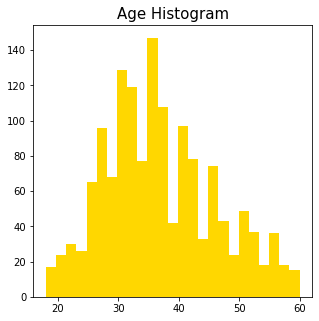

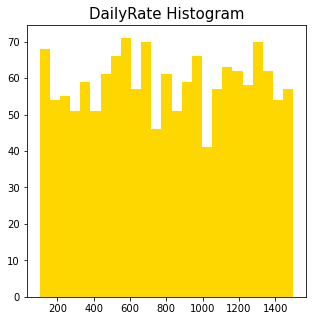

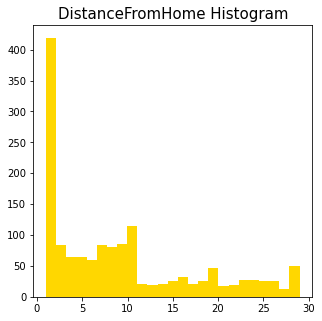

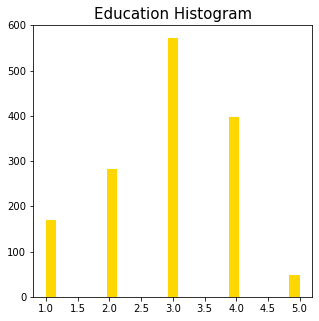

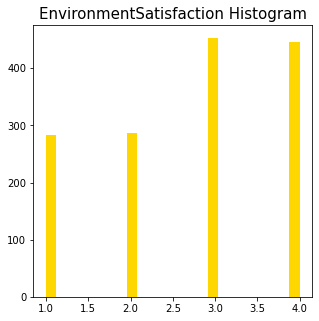

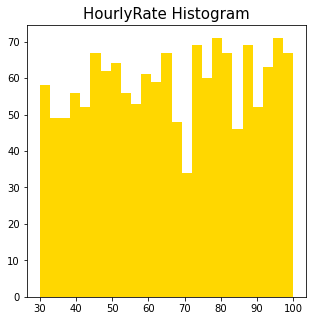

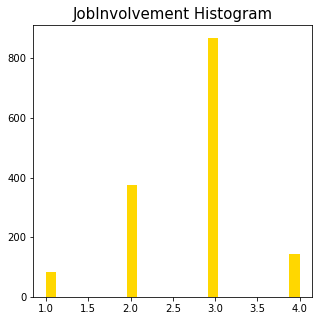

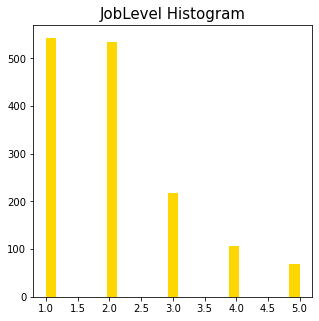

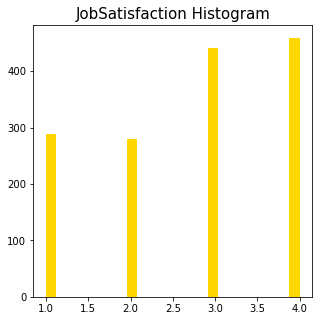

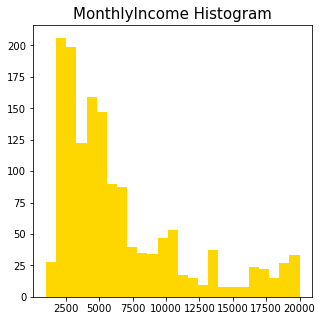

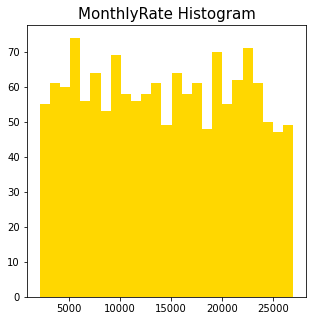

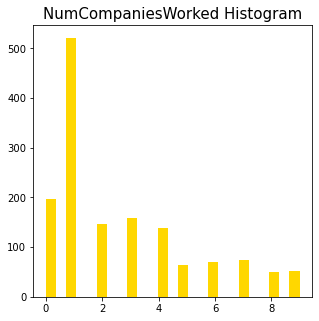

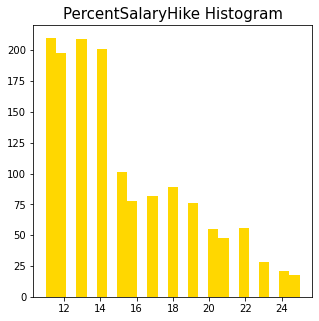

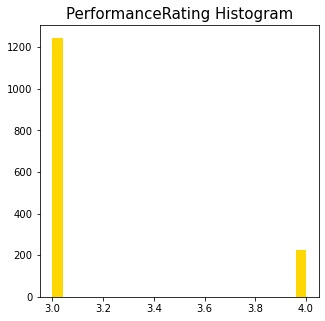

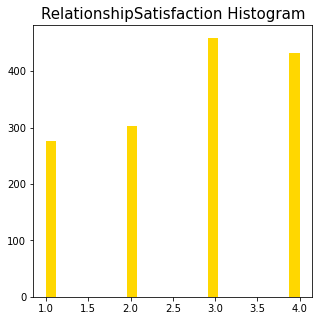

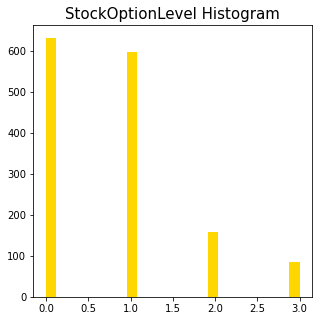

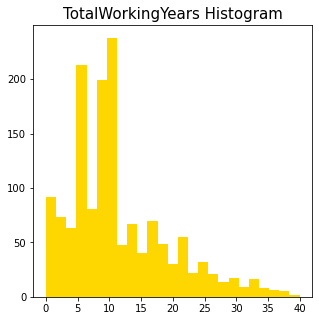

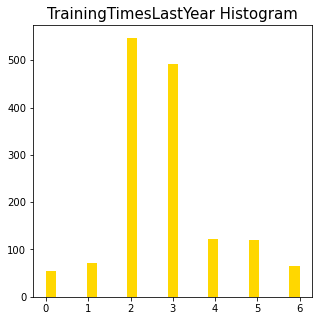

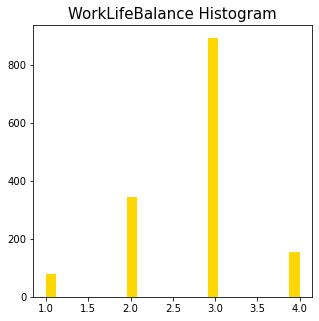

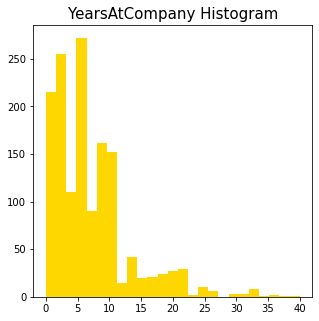

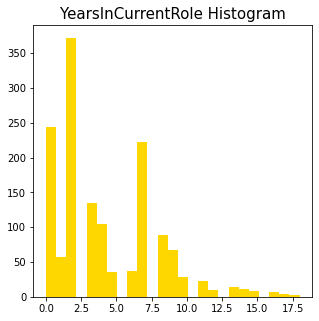

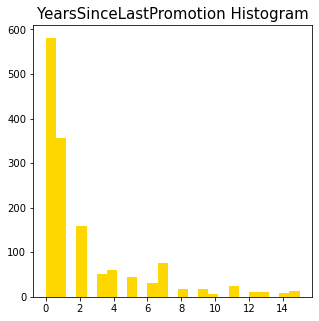

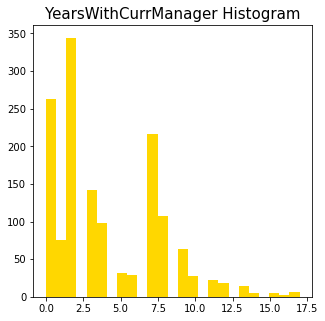

In [39]:

for feature in num_col.columns:
    fig,ax = plt.subplots(sharex=True,figsize=(5,5))
    ax.hist(df[feature], bins = 25, color= 'gold')
    ax.set_title(feature + " Histogram",fontsize=15)
    plt.show()

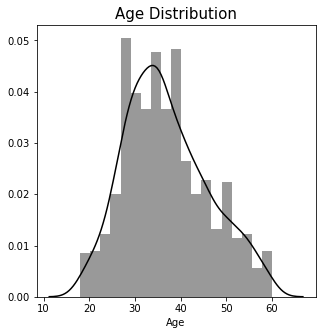

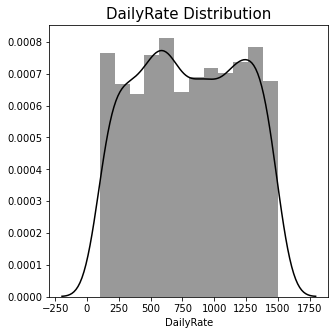

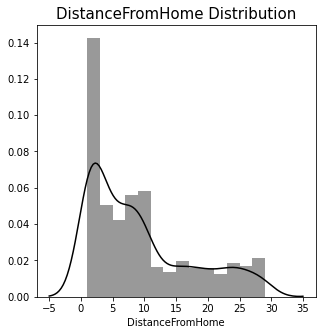

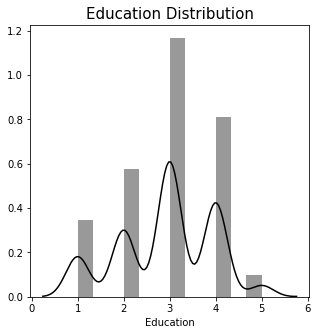

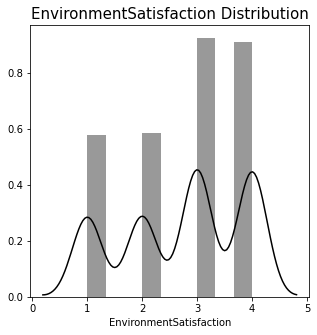

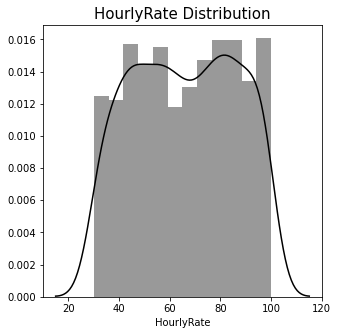

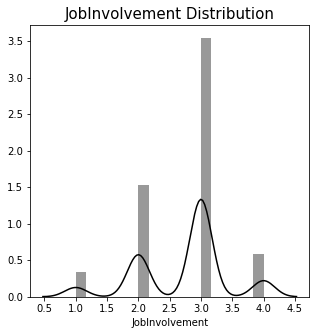

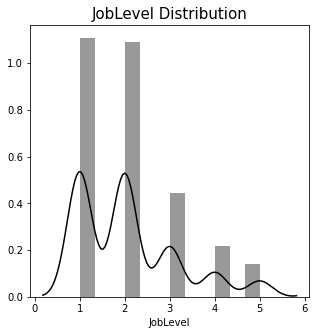

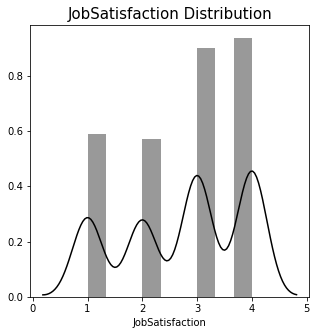

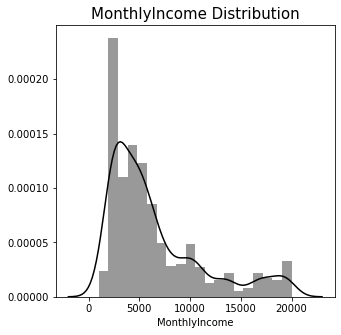

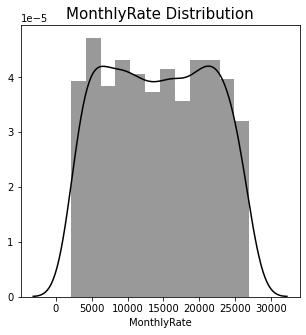

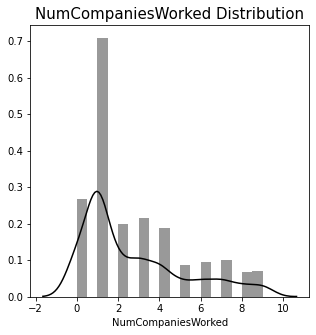

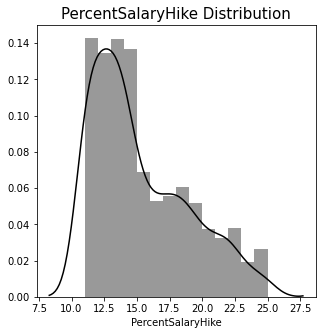

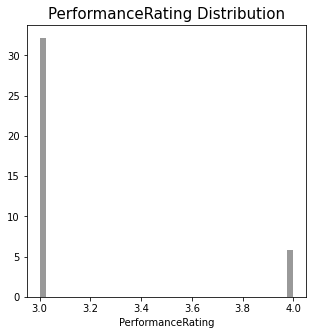

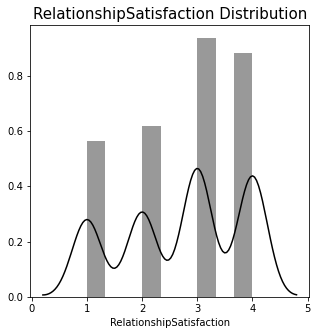

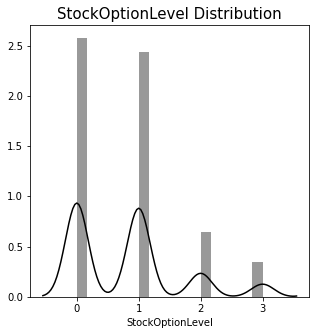

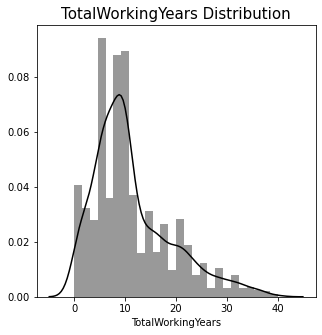

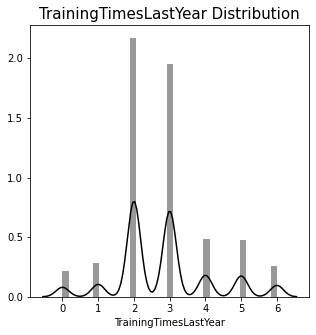

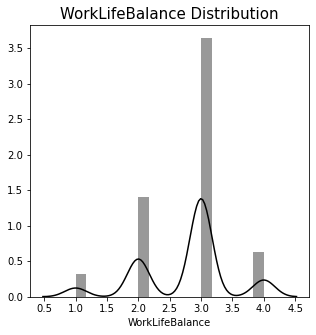

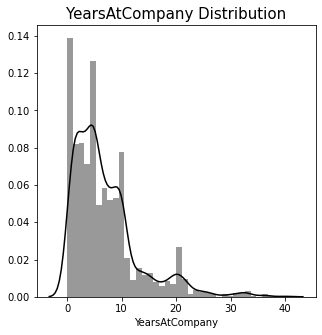

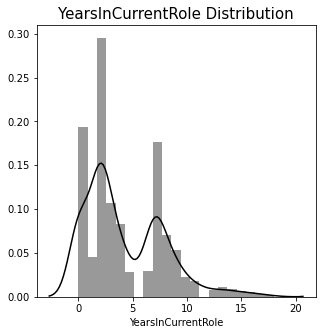

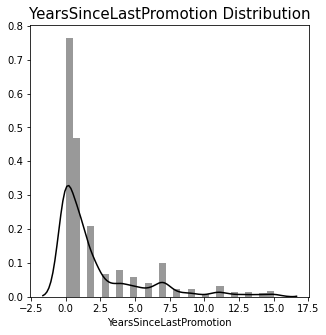

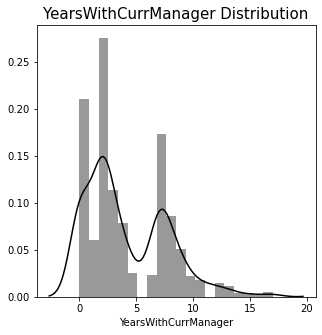

In [40]:

for feature in num_col.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature], kde=True, color='black')
    plt.title(feature + " Distribution",fontsize=15)
    plt.show()

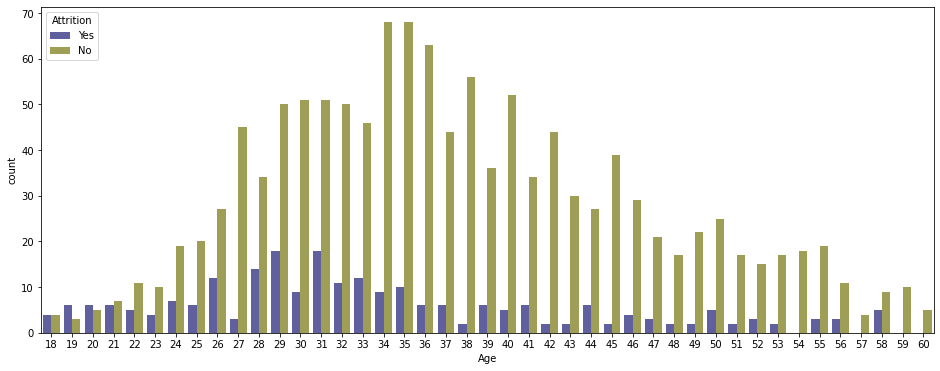

In [41]:
plt.figure(figsize=(16,6))
sns.set_style='ticks'
sns.countplot(x='Age', hue='Attrition',palette='gist_stern',data=df)
plt.show()

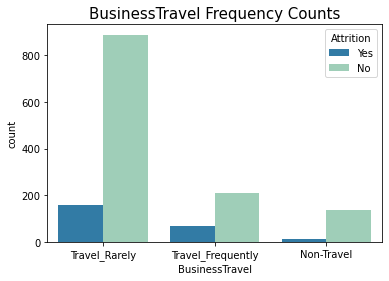

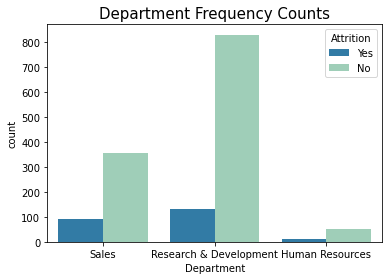

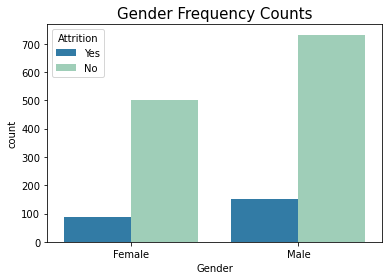

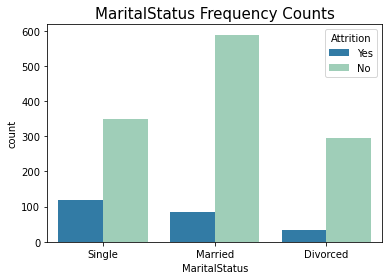

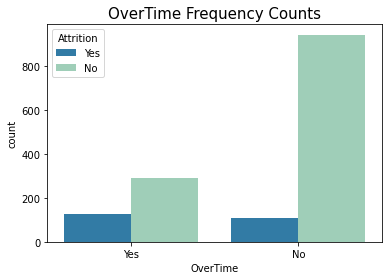

In [42]:
#For countplot(object column)
count_obj_col=obj_col.drop(['JobRole','EducationField'],axis= 1)
for col in count_obj_col: 
    sns.countplot(df[col],data = df, hue='Attrition',palette='YlGnBu_r')
    plt.title(col + " Frequency Counts",fontsize=15)
    plt.show()

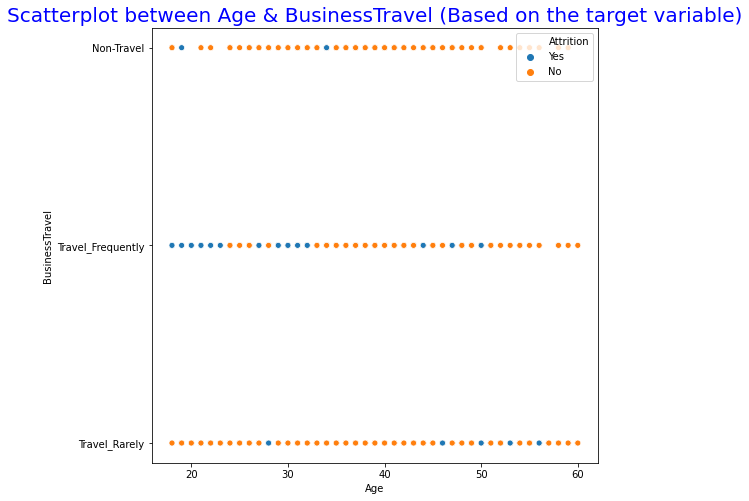

In [43]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Age', y='BusinessTravel', hue= 'Attrition', data= df )
plt.title('Scatterplot between Age & BusinessTravel (Based on the target variable)', fontsize=20, color='blue')

plt.show()

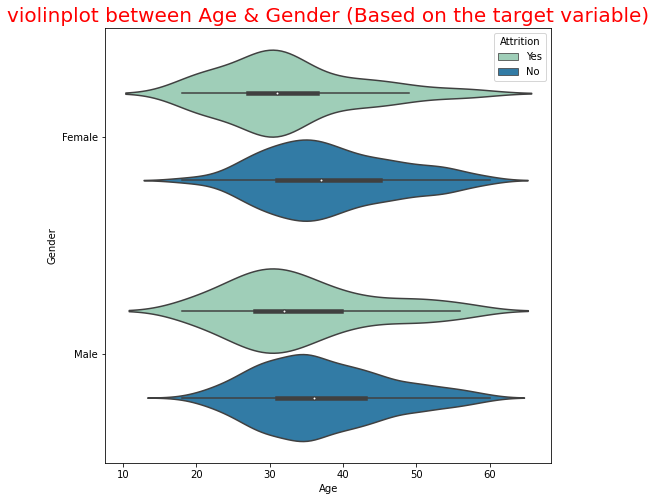

In [44]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Age', y='Gender', hue= 'Attrition', data= df ,palette='YlGnBu')
plt.title('violinplot between Age & Gender (Based on the target variable)', fontsize=20, color='red')

plt.show()

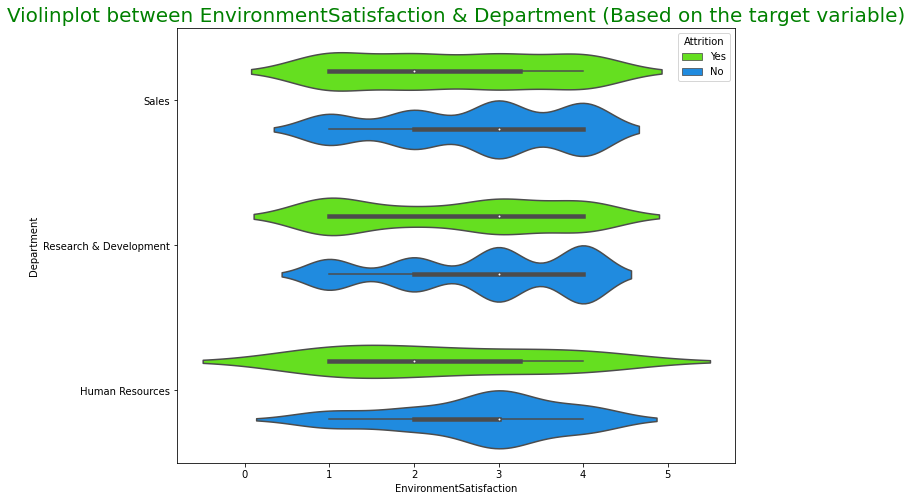

In [45]:
plt.figure(figsize=(10,8))
sns.violinplot(x='EnvironmentSatisfaction', y='Department', data= df,  hue= 'Attrition',palette='gist_rainbow')
plt.title('Violinplot between EnvironmentSatisfaction & Department (Based on the target variable)', fontsize=20, color='green')

plt.show()

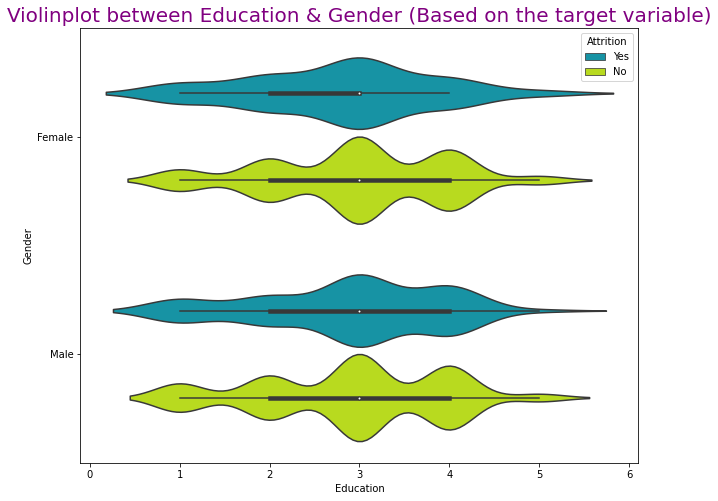

In [46]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Education', y='Gender', data= df,  hue= 'Attrition',palette='nipy_spectral')
plt.title('Violinplot between Education & Gender (Based on the target variable)', fontsize=20, color='purple')

plt.show()

In [47]:
#Co-Relation
df.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


# plotting this Co-Relation using heatmap(seaborn)

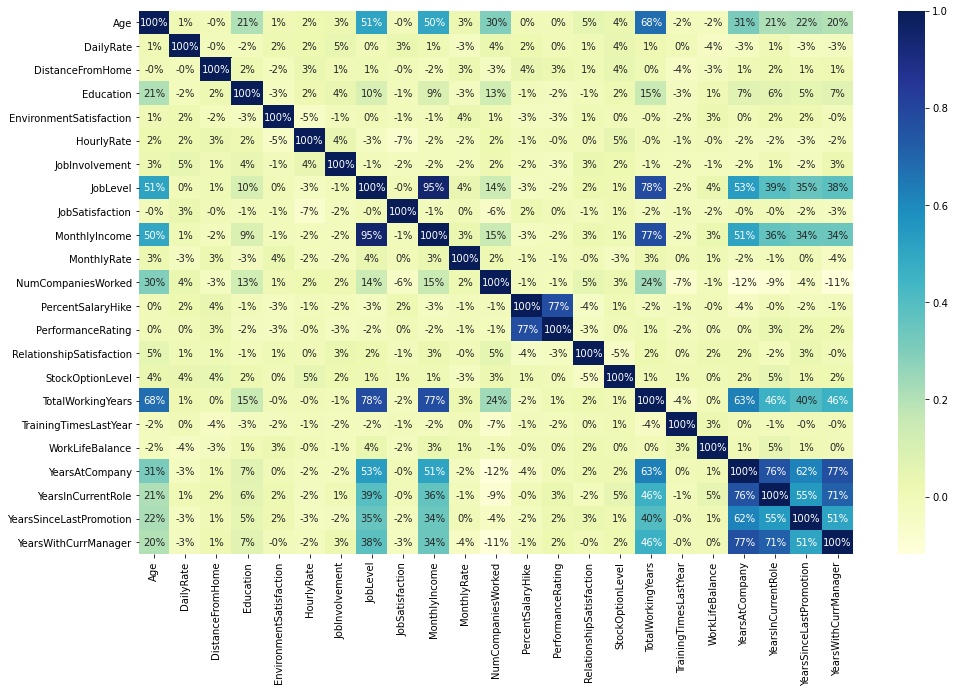

In [48]:

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.0%')
plt.show()

In [49]:
#LabelEncoding
le_col=df[['Attrition','Gender','OverTime']]

le=LabelEncoder()
le_col_dummy=le_col.apply(le.fit_transform)

In [50]:
obj_col.drop(['Gender','OverTime'],axis=1,inplace=True)

In [51]:
#get_dummies
obj_col_dummy=pd.get_dummies(obj_col)

In [52]:
#Now combine the data(le_col,obj_col_dummy,num_col)
combinedf=pd.concat([le_col_dummy,obj_col_dummy,num_col],axis=1)

In [53]:
combinedf.head()

,Attrition,Gender,OverTime,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,0,1,0,0,1,0,...,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,4,1,10,3,3,10,7,1,7
2,1,1,1,0,0,1,0,1,0,0,...,3,2,0,7,3,3,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,0,0,0,1,0,1,0,0,...,3,4,1,6,3,3,2,2,2,2


In [54]:
combinedf.shape

(1470, 50)

In [55]:
x=combinedf.drop('Attrition',axis=1)
y=combinedf.Attrition

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc= StandardScaler()

In [58]:
X= sc.fit_transform(x)


In [59]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=10)

In [60]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1102, 49) (368, 49) (1102,) (368,)


In [61]:
logreg=LogisticRegression()


In [62]:
logmodel=logreg.fit(x_train,y_train)

In [63]:
logpred = logmodel.predict(x_test)

In [64]:
print('Accuracy with LogisticRegression : ' + str(round(accuracy_score(y_test,logpred),2)*100) + '%')

Accuracy with LogisticRegression : 88.0%


In [65]:
logmodel.score(x_train,y_train)#Training data accuracy

0.8920145190562614

In [66]:
tree= DecisionTreeClassifier()

In [67]:
treemodel= tree.fit(x_train,y_train)

In [68]:
treepred=treemodel.predict(x_test)

In [69]:
print('Accuracy with DecisionTreeClassifier : ' + str(round(accuracy_score(y_test,treepred),2)*100) + '%')

Accuracy with DecisionTreeClassifier : 82.0%


In [70]:
print('Accuracy with DecisionTreeClassifier (train data) : '
      + str(round(treemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with DecisionTreeClassifier (train data) : 100.0%


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf= RandomForestClassifier()

In [73]:
rfmodel= rf.fit(x_train,y_train)

In [74]:
rfpred= rfmodel.predict(x_test)

In [75]:
print('Accuracy with RandomForestClassifier : ' + str(round(accuracy_score(y_test,rfpred),2)*100) + '%')

Accuracy with RandomForestClassifier : 84.0%


In [76]:
print('Accuracy with RandomForestClassifier (train data) : '
      + str(round(rfmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with RandomForestClassifier (train data) : 100.0%


In [77]:
from xgboost import XGBClassifier

In [78]:
xgb= XGBClassifier()

In [79]:
xgbmodel= xgb.fit(x_train,y_train)

[03:58:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
xgbpred= xgbmodel.predict(x_test)

In [81]:
print('Accuracy with XGBClassifier : ' + str(round(accuracy_score(y_test,xgbpred),2)*100) + '%')

Accuracy with XGBClassifier : 85.0%


In [82]:
print('Accuracy with XGBClassifier (train data) : '
      + str(round(xgbmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with XGBClassifier (train data) : 100.0%


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
gbm= GradientBoostingClassifier()

In [85]:
gbmmodel=gbm.fit(x_train,y_train)

In [86]:
gbmpred=gbmmodel.predict(x_test)

In [87]:
print('Accuracy with GradientBoostingClassifier : ' + str(round(accuracy_score(y_test,gbmpred),2)*100) + '%')

Accuracy with GradientBoostingClassifier : 88.0%


In [88]:
print('Accuracy with GradientBoostingClassifier (train data) : '
      + str(round(gbmmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with GradientBoostingClassifier (train data) : 96.0%


In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn=KNeighborsClassifier()


In [91]:
knnmodel= knn.fit(x_train,y_train)

In [92]:
knnpred=knnmodel.predict(x_test)

In [93]:
print('Accuracy with KNeighborsClassifier : ' + str(round(accuracy_score(y_test,knnpred),2)*100) + '%')

Accuracy with KNeighborsClassifier : 83.0%


In [94]:
print('Accuracy with KNeighborsClassifier (train data) : '
      + str(round(knnmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with KNeighborsClassifier (train data) : 88.0%


In [95]:
from sklearn.svm import SVC

In [96]:
svm=SVC()

In [97]:
svmmodel= svm.fit(x_train,y_train)

In [98]:
svmpred=svmmodel.predict(x_test)

In [99]:
print('Accuracy with SVC : ' + str(round(accuracy_score(y_test,svmpred),2)*100) + '%')

Accuracy with SVC : 85.0%


In [100]:
print('Accuracy with SVC (train data) : '
      + str(round(svmmodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with SVC (train data) : 91.0%


# Hyperparameter Tuning

### 1) hyperparameter tuning for KNeighborsClassifier

In [101]:
'''
params={'n_neighbors':range(1,20),'weights':['uniform','distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' : range(1,10)}
'''

"\nparams={'n_neighbors':range(1,20),'weights':['uniform','distance'],\n        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size' : range(1,10)}\n"

In [102]:
#gds=GridSearchCV(knn,params)

In [103]:
#gdsmodel=gds.fit(x_train,y_train)

In [104]:
#gdsmodel.best_params_

In [105]:
knn_tune=KNeighborsClassifier(n_neighbors=12,weights='uniform',leaf_size= 1,algorithm= 'auto')

In [106]:
knn_tunemodel=knn.fit(x_train,y_train)

In [107]:
knn_tunepred= knn_tunemodel.predict(x_test)

In [108]:
print('Accuracy with KNeighborsClassifier (train data) : '
      + str(round(knn_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with KNeighborsClassifier (train data) : 88.0%


In [109]:
print('Accuracy with KNeighborsClassifier : ' + str(round(accuracy_score(y_test,knn_tunepred),2)*100) + '%')

Accuracy with KNeighborsClassifier : 83.0%


### 2) hyperparameter tuning for DecisionTreeClassifier


In [110]:

#params_tree={'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split':[1,2,3,4,5,6,7,8]}

In [111]:
#gds_tree=GridSearchCV(tree,params_tree)

In [112]:
#gds_treemodel=gds_tree.fit(x_train,y_train)

In [113]:
#gds_treemodel.best_params_

In [114]:
tree_tune=DecisionTreeClassifier(max_depth= 1, min_samples_split= 2)

In [115]:
tree_tunemodel=tree_tune.fit(x_train,y_train)

In [116]:
tree_tunepred=tree_tunemodel.predict(x_test)

In [117]:
print('Accuracy with DecisionTreeClassifier (train data) : '
      + str(round(tree_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with DecisionTreeClassifier (train data) : 85.0%


In [118]:
print('Accuracy with DecisionTreeClassifier : ' + str(round(accuracy_score(y_test,tree_tunepred),2)*100) + '%')

Accuracy with DecisionTreeClassifier : 82.0%


### 3) hyperparameter tuning for random forest

In [119]:
rf_tune= RandomForestClassifier(
 max_depth= 8,
 min_samples_split= 5,
 n_estimators= 60)

In [120]:
rf_tunemodel= rf_tune.fit(x_train,y_train)

In [121]:
rf_tunepred=rf_tunemodel.predict(x_test)

In [122]:
print('Accuracy with RandomForestClassifier : ' + str(round(accuracy_score(y_test,rf_tunepred),2)*100) + '%')

Accuracy with RandomForestClassifier : 84.0%


In [123]:
print('Accuracy with RandomForestClassifier (train data) : '
      + str(round(rf_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with RandomForestClassifier (train data) : 93.0%


### 4) hyperparameter tuning for SVC







In [124]:
#params_svc={'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']}
#grid_svc= GridSearchCV(svm,params_svc)

In [125]:
#gds_svcmodel=grid_svc.fit(x_train,y_train)

In [126]:
#gds_svcmodel.best_params_

In [127]:
svc_tune=SVC(C= 100, gamma = 0.001, kernel= 'rbf')

In [128]:
svc_tunemodel=svc_tune.fit(x_train,y_train)

In [129]:
svc_tunepred= svc_tunemodel.predict(x_test)

In [130]:
print('Accuracy with SVC : ' + str(round(accuracy_score(y_test,svc_tunepred),2)*100) + '%')

Accuracy with SVC : 88.0%


In [131]:
print('Accuracy with SVC (train data) : '
      + str(round(svc_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with SVC (train data) : 92.0%


### 5) hyperparameter tuning for GradientBoostingClassifier


In [132]:
gbm_tune=GradientBoostingClassifier(n_estimators = 300, max_depth= 2, subsample=0.8)

In [133]:
gbm_tunemodel=gbm_tune.fit(x_train,y_train)

In [134]:
gbm_tunepred=gbm_tunemodel.predict(x_test)

In [135]:
print('Accuracy with GradientBoostingClassifier (train data) : '
      + str(round(gbm_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy                                           

Accuracy with GradientBoostingClassifier (train data) : 97.0%


In [136]:
print('Accuracy with GradientBoostingClassifier : ' + str(round(accuracy_score(y_test,gbm_tunepred),2)*100) + '%')             

Accuracy with GradientBoostingClassifier : 88.0%


### 6) hyperparameter tuning for XGBClassifier


In [137]:
xgb_tune= XGBClassifier(colsample_bytree =0.4,gamma=0.1,learning_rate=0.2,max_depth=3,min_child_weight=1,eval_metric='mlogloss')

In [138]:
xgb_tunemodel=xgb_tune.fit(x_train,y_train)

In [139]:
xgb_tunepred= xgb_tunemodel.predict(x_test)

In [140]:
print('Accuracy with XGBClassifier : ' + str(round(accuracy_score(y_test,xgb_tunepred),2)*100) + '%')

Accuracy with XGBClassifier : 87.0%


In [141]:
print('Accuracy with XGBClassifier (train data) : '
      + str(round(xgb_tunemodel.score(x_train,y_train),2)*100) + '%') #Training data accuracy

Accuracy with XGBClassifier (train data) : 97.0%


# Cross Validation

In [142]:
model_a=[logreg,knn_tune,rf_tune,xgb_tune,tree_tune,svc_tune,gbm_tune]

In [147]:
for i in model_a:
    cv=cross_val_score(i,x_train,y_train)
    print(np.mean(cv))

   

0.8675236528177704
0.8493665158371041
0.8557219251336898
0.8684162895927601
0.8466433566433567
0.8765734265734265
0.8693212669683259


# Model Comparison

In [144]:
models=[['Logistic Regression',str(round(accuracy_score(y_test,logpred),2)*100) + '%'],
    ['Random Forest',str(round(rf_tunemodel.score(x_train,y_train),2)*100) + '%'],
    ['XGBClassifier',str(round(xgb_tunemodel.score(x_train,y_train),2)*100) + '%'],
    ['KNeighborsClassifier',str(round(knn_tunemodel.score(x_train,y_train),2)*100) + '%'],
    ['Support Vector Machine(SVM)',str(round(svc_tunemodel.score(x_train,y_train),2)*100) + '%'],
    ['GradientBoostingClassifier',str(round(gbm_tunemodel.score(x_train,y_train),2)*100) + '%'],
    ['DecisionTreeClassifier',str(round(tree_tunemodel.score(x_train,y_train),2)*100) + '%']]
     


In [145]:
pd.DataFrame(models,columns= ['Model Name', 'Accuracy'])

,Model Name,Accuracy
0,Logistic Regression,88.0%
1,Random Forest,93.0%
2,XGBClassifier,97.0%
3,KNeighborsClassifier,88.0%
4,Support Vector Machine(SVM),92.0%
5,GradientBoostingClassifier,97.0%
6,DecisionTreeClassifier,85.0%


# Conclusion: So, according to the analysis we can see that XGBClassifier gives best result.Hence, XGBClassifier is the best fit model.
